In [1]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # For treemap plotting
import sys
sys.path.insert(0, '../functions/matplotlib-extra-master/src')
import mpl_extra.treemap as tr

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

QC_stats_df = pd.read_csv('../data/interim/metadata_qc_part2_all.tsv', delimiter = '\t')

In [10]:
keep = []
for index, row in ica_data.gene_table.iterrows():
    if 'ZMO0958' in str(row['ZM4_locus']):
        keep.append(index)
ica_data.gene_table.loc[keep]

,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,operon,kegg_maps,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,interpro_annotation,chromosome_id,iMs


In [11]:
ica_data.view_imodulon('nitrogen_fixation')

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,operon,kegg_maps,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,interpro_annotation,chromosome_id,iMs
ZCP4_1344,0.138938,ZCP4_1344,CP006818.1,1510328.0,1511485.0,-,cysteine desulfurase NifS,Coenzyme transport and metabolism,NaN,NaN,Op1431,map00730;map01100;map04122,2.8.1.7,ZMO1_ZMO1834,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1346,0.209056,ZCP4_1346,CP006818.1,1511808.0,1512131.0,-,Iron-sulfur cluster assembly accessory protein,Function unknown,NaN,NaN,Op1433,NaN,NaN,ZMO1_ZMO1832,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1348,0.186421,ZCP4_1348,CP006818.1,1512910.0,1513194.0,-,ferredoxin III%2C nif-specific,Energy production and conversion,NaN,D9PNM8,Op1435,NaN,NaN,ZMO1_ZMO2028,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,"['iron_sulfur', 'nitrogen_fixation']"
ZCP4_1349,0.222304,ZCP4_1349,CP006818.1,1513231.0,1513671.0,-,putative nitrogen fixation protein,Function unknown,ZCP4_0900,Q5NLF7,Op1436,NaN,NaN,ZMO1_ZMO1829,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1350,0.196051,ZCP4_1350,CP006818.1,1513685.0,1514179.0,-,nitrogen fixation protein NifX,Function unknown,NaN,Q5NLF8,Op1437,NaN,NaN,ZMO1_ZMO1828,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1351,0.227765,ZCP4_1351,CP006818.1,1514172.0,1515542.0,-,nitrogenase molybdenum-iron cofactor biosynthe...,Coenzyme transport and metabolism,NaN,Q5NLF9,Op1438,NaN,NaN,ZMO1_ZMO1827,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1352,0.221687,ZCP4_1352,CP006818.1,1515539.0,1516993.0,-,nitrogenase molybdenum-iron cofactor biosynthe...,Energy production and conversion,NaN,Q5NLG0,Op1439,NaN,NaN,ZMO1_ZMO1826,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1353,0.276871,ZCP4_1353,CP006818.1,1517062.0,1518597.0,-,Mo-nitrogenase MoFe protein subunit NifK,Energy production and conversion,NaN,Q5NLG1,Op1440,map00625;map00910;map01100;map01120,1.18.6.1,ZMO1_ZMO1825,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1354,0.307049,ZCP4_1354,CP006818.1,1518657.0,1520132.0,-,Mo-nitrogenase MoFe protein subunit NifD precu...,Energy production and conversion,NaN,Q5NLG2,Op1441,map00625;map00910;map01100;map01120,1.18.6.1,ZMO1_ZMO1824,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,['nitrogen_fixation']
ZCP4_1355,0.298938,nifH,CP006818.1,1520143.0,1521030.0,-,Mo-nitrogenase iron protein subunit NifH,"Cell cycle control, cell division, chromosome ...",NaN,Q5NLG3,Op1442,map00625;map00860;map00910;map01100;map01110;m...,"1.18.6.1,1.3.7.7",ZMO1_ZMO1823,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1,"['membrane_cobalmin', 'nitrogen_fixation']"


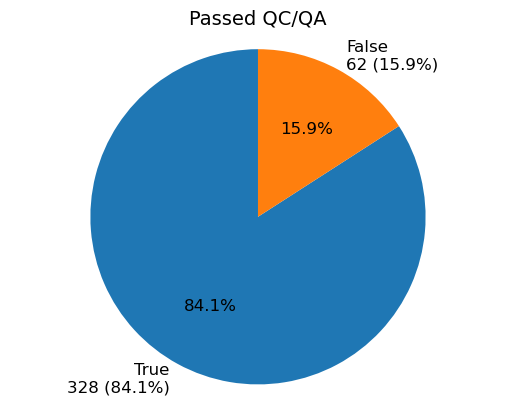

In [3]:
# let's create some summary tables, first pie chart of QC pass/fail
data = dict(QC_stats_df.passed_curation.value_counts())
total = sum(data.values())

# Calculate percentages
percentages = {key: (value / total) * 100 for key, value in data.items()}

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(
    data.values(),
    labels=[f"{key}\n{value} ({percentages[key]:.1f}%)" for key, value in data.items()],
    autopct='%.1f%%', 
    startangle=90, 
    textprops={'fontsize': 12}
)
ax.set_title('Passed QC/QA', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the chart
plt.show()

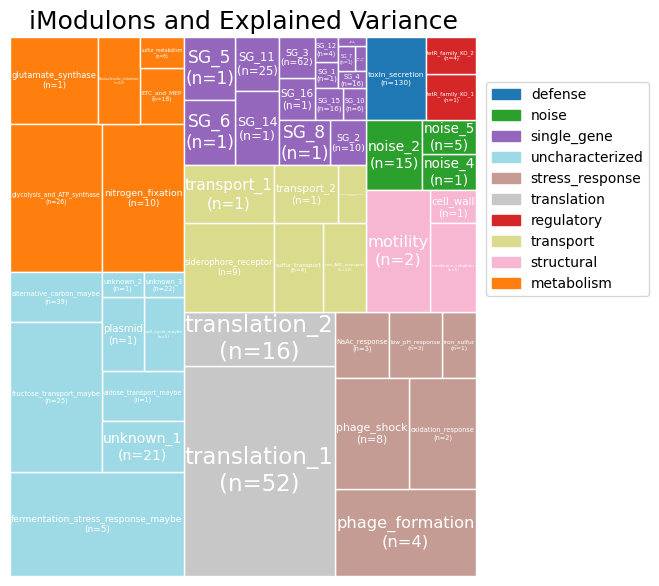

In [4]:
# explained variance treemap plot
df = ica_data.imodulon_table
df = df.sort_values(by = 'category')
df['labels'] = [index + '\n(n='+str(size)+')' for (index, size) in zip(df.index, ica_data.imodulon_table.imodulon_size)]

# Dynamically generate a color palette for unique categories
unique_categories = df['category'].unique()
palette = sns.color_palette('tab20', len(unique_categories))  # 'tab20' gives up to 20 distinct colors
color_map = dict(zip(unique_categories, palette))

# Map colors to categories
colors = df['category'].map(color_map)

# Create the treemap
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.156))
trc = tr.treemap(ax, df, area = 'explained_variance', labels = 'labels',
           cmap='tab20', fill='category', levels = ['category', 'labels'],
           rectprops=dict(ec='w'),
           textprops=dict(c='w'))

# make a legend
handles = sorted(trc.handles['labels'], 
                 key=lambda x: (x.get_ec(),x.get_label()))
legend = fig.legend(handles=[handles[i] for i in range(len(handles))],
          ncol=1, loc='lower left', bbox_to_anchor=(0.85, 0.5))

# Customize the plot
plt.title('iModulons and Explained Variance', fontsize=18)
plt.axis('off')  # Remove axes
plt.show()